<a href="https://colab.research.google.com/github/RajathGopinathMenon/MLDL_PROJECT/blob/main/Exploring_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXPLORING DATASET**

In [1]:
# Step 1: Download the dataset (LineMOD)
# Download LineMOD dataset
!mkdir -p datasets/linemod/
%cd /content/datasets/linemod/

/content/datasets/linemod


In [2]:
# Download DenseFusion Folder (Which includes a portion of the LimeMOD dataset)

!gdown --folder "https://drive.google.com/drive/folders/19ivHpaKm9dOrr12fzC8IDFczWRPFxho7"
%cd DenseFusion/
!unzip Linemod_preprocessed.zip

Streaming output truncated to the last 5000 lines.
  inflating: Linemod_preprocessed/segnet_results/11_label/0206_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0207_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0208_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0209_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0210_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0211_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0212_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0213_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0214_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0215_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0216_label.png  
  inflating: Linemod_preprocessed/segnet_results/11_label/0218_label.png  
  inflating: Linemod_preprocessed/segnet_results/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/LineMOD_DATASET/Linemod_preprocessed.zip

unzip:  cannot find or open /content/drive/MyDrive/LineMOD_DATASET/Linemod_preprocessed.zip, /content/drive/MyDrive/LineMOD_DATASET/Linemod_preprocessed.zip.zip or /content/drive/MyDrive/LineMOD_DATASET/Linemod_preprocessed.zip.ZIP.


In [4]:
!pip install pcl

  Preparing metadata (setup.py) ... done
  Created wheel for pcl: filename=pcl-0.0.0.post1-py3-none-any.whl size=1690 sha256=dfc69f01a05c7c6fc2752e70599a534e77810538d00948957d53e605abcc42a9
  Stored in directory: /root/.cache/pip/wheels/1b/bb/f6/c265bd6290eba943c39fb0181f694c57c2bf0d24f8348f7219
Successfully built pcl


In [5]:
import os
import yaml
import torch
#import open3d as o3d
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [6]:
#%cd /content/datasets

In [7]:
#%cd linemod

In [8]:
#%pwd

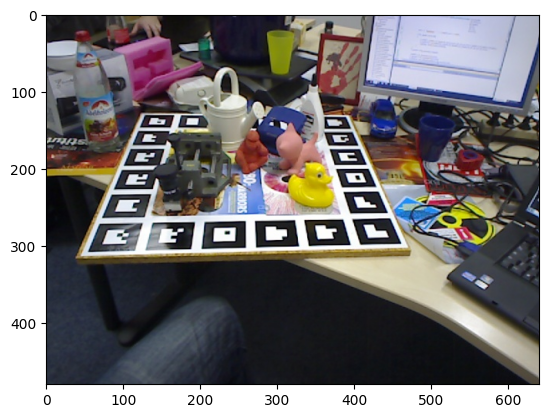

In [10]:
img_path = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/rgb/0000.png"
img = Image.open(img_path).convert("RGB")
plt.imshow(img)

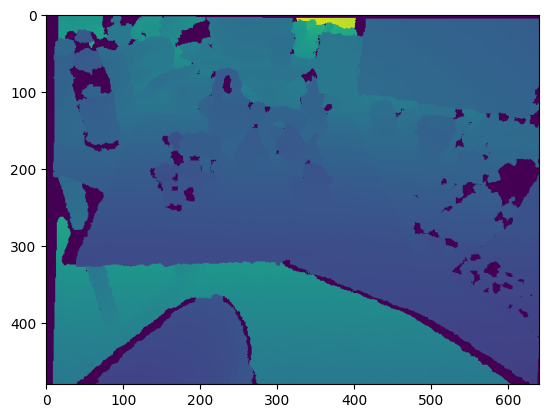

In [11]:
img_path = "/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/depth/0000.png"
img = Image.open(img_path)
plt.imshow(img)

In [12]:
pose_file = '/content/datasets/linemod/DenseFusion/Linemod_preprocessed/data/01/gt.yml'
# Load the ground truth poses from the gt.yml file
with open(pose_file, 'r') as f:
  pose_data = yaml.load(f, Loader=yaml.FullLoader)
pose = pose_data[1][0]

In [13]:
print(pose.keys()) # information inside file

dict_keys(['cam_R_m2c', 'cam_t_m2c', 'obj_bb', 'obj_id'])


In [14]:
bbox = np.array(pose['obj_bb'], dtype=np.float32) #[4]
obj_id = np.array(pose['obj_id'], dtype=np.float32) #[1]
print("BOUNDING BOX: ", bbox)
print("OBJECT ID: ", obj_id)

BOUNDING BOX:  [234. 151.  44.  58.]
OBJECT ID:  1.0


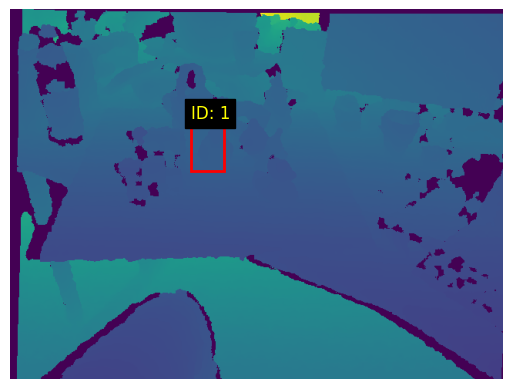

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Plot image with bounding box
fig, ax = plt.subplots()
ax.imshow(img)

# Create a rectangle patch
rect = patches.Rectangle(
    (bbox[0], bbox[1]),  # (x, y)
    bbox[2],             # width
    bbox[3],             # height
    linewidth=2,
    edgecolor='red',
    facecolor='none'
)

# Add the rectangle to the plot
ax.add_patch(rect)

# Optionally add object ID label
ax.text(bbox[0], bbox[1] - 10, f'ID: {int(obj_id)}', color='yellow', fontsize=12, backgroundcolor='black')

plt.axis('off')
plt.show()